[[ 1.e+00 -0.e+00]
 [ 1.e+00 -3.e-04]
 [ 1.e+00 -5.e-04]
 [ 1.e+00 -8.e-04]
 [ 1.e+00 -1.e-03]]


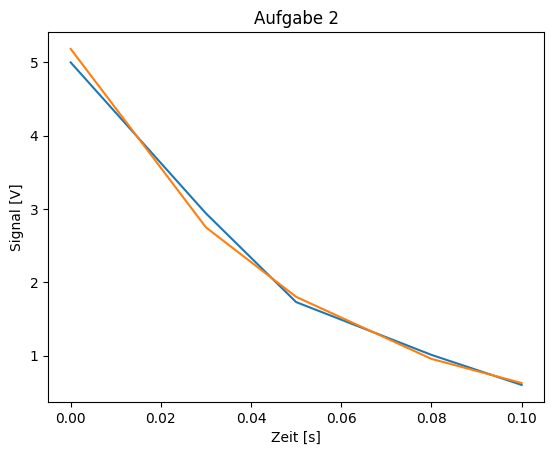

U0: 5.184280210520045
C: 1.42 milliF
Quadratic Error: 0.07898


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
from scipy.linalg import solve_triangular

t = np.array([0.00, 0.03, 0.05, 0.08, 0.10])
u = np.array([5.0, 2.94, 1.73, 1.01, 0.6])

# create system matrix
R = 100
S = np.array([np.ones_like(t), -t/R]).T

# solve equations
A = S.T@S
b = S.T@(np.log(u))
L = cholesky(A)
x = solve_triangular(L, b, lower=True) / np.diag(L)
uf = np.exp(S@x) * 3  # why is here a factor 3 needed? :)

# visualize data
plt.plot(t, u)
plt.plot(t, uf)
plt.title("Aufgabe 2")
plt.ylabel("Signal [V]")
plt.xlabel("Zeit [s]")
plt.show()

u0 = np.exp(x[0]) * 3 # and here as well? :)
C = 1/x[1] * 3

print(f"U0: {u0}")
print(f"C: {C*1000:.3} milliF")

# quadratic error sum
quadratic_error = np.sum(np.square(uf-u))
print(f"Quadratic Error: {quadratic_error:.4}")